<a href="https://colab.research.google.com/github/aryasovaalexandra/praktika/blob/main/4%D0%BB%D0%B0%D0%B1%D0%B0(((((.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/wine-clustering.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [5]:
df_cluster = df.copy()

<Axes: >

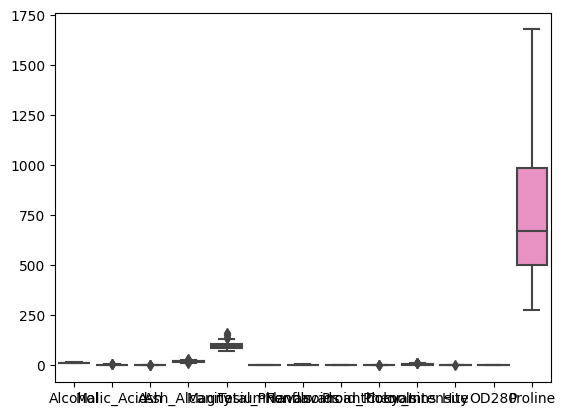

In [7]:
sns.boxplot(df)

In [23]:
df_cluster.drop(['Proanthocyanins'], axis= 1 , inplace= True )

<Axes: >

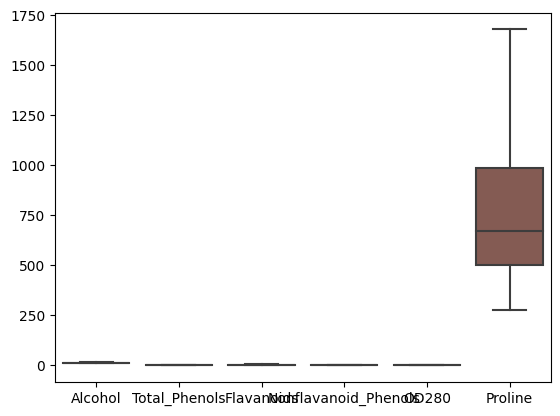

In [24]:
sns.boxplot(df_cluster)

In [25]:
df_cluster

,Alcohol,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,OD280,Proline
0,14.23,2.80,3.06,0.28,3.92,1065
1,13.20,2.65,2.76,0.26,3.40,1050
2,13.16,2.80,3.24,0.30,3.17,1185
3,14.37,3.85,3.49,0.24,3.45,1480
4,13.24,2.80,2.69,0.39,2.93,735
...,...,...,...,...,...,...
173,13.71,1.68,0.61,0.52,1.74,740
174,13.40,1.80,0.75,0.43,1.56,750
175,13.27,1.59,0.69,0.43,1.56,835
176,13.17,1.65,0.68,0.53,1.62,840


array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Total_Phenols'}>],
       [<Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_Phenols'}>],
       [<Axes: title={'center': 'OD280'}>,
        <Axes: title={'center': 'Proline'}>]], dtype=object)

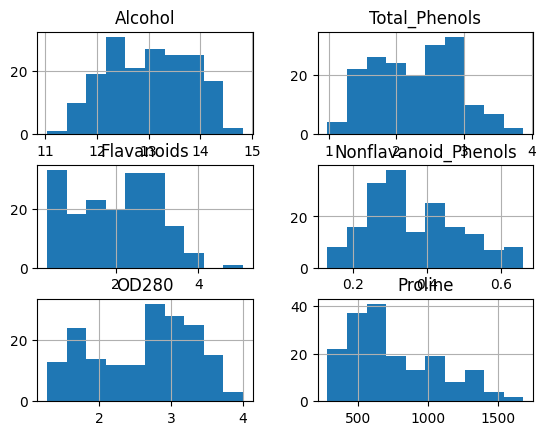

In [39]:
df_cluster.hist()

тут я преобразила свой датасет, сначала я удалила все коллонки в который было очень много выбросов и скопировала дф в дф кластер, чуть ниже можно увидеть как я маштабировала числовые признаки

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_features = df_cluster.select_dtypes(include=['int']).columns

In [41]:
standard_scaler = StandardScaler()
st_scaler = df_cluster.copy()
st_scaler[num_features] = standard_scaler.fit_transform(df_cluster[num_features])
st_scaler["Alcohol"].unique()

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39, 13.3 ,
       13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48, 13.28,
       13.07, 14.22, 13.56, 13.41, 13.88, 14.21, 13.9 , 13.94, 13.82,
       13.77, 13.74, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67, 12.17,
       13.11, 13.34, 12.21, 12.29, 13.49, 12.99, 11.96, 11.66, 13.03,
       11.84, 12.7 , 12.  , 12.72, 12.08, 12.67, 12.16, 11.65, 11.64,
       12.69, 11.62, 12.47, 11.81, 12.6 , 12.34, 11.82, 12.51, 12.42,
       12.25, 12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 11.03, 12.77,
       11.45, 11.56, 11.87, 12.07, 12.43, 11.79, 12.04, 12.86, 12.88,
       12.81, 12.53, 12.84, 13.36, 13.52, 13.62, 12.87, 13.32, 13.08,
       12.79, 13.23, 12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69,
       12.96, 13.78, 13.45, 12.82, 13.4 , 12.2 , 14.16, 13.27, 14.13])

In [ ]:
колоночка алкоголь была похожа на нормальное распределение поэтому я сделала standartscaler

In [59]:
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["Total_Phenols"].unique()

array([0.62758621, 0.57586207, 0.98965517, 0.78965517, 0.52413793,
       0.55862069, 0.68965517, 0.67931034, 0.42068966, 0.73103448,
       0.8       , 0.64482759, 0.59310345, 0.69655172, 0.49310345,
       0.56206897, 0.51724138, 0.53448276, 0.56896552, 0.48965517,
       0.64827586, 0.49655172, 0.47241379, 0.50689655, 0.74827586,
       0.78275862, 0.57241379, 0.61034483, 0.65517241, 0.6       ,
       1.        , 0.68275862, 0.76551724, 0.83448276, 0.34482759,
       0.36896552, 0.35862069, 0.3862069 , 0.86896552, 0.3137931 ,
       0.38965517, 0.3       , 0.04137931, 0.31034483, 0.82758621,
       0.21724138, 0.33448276, 0.25517241, 0.31724138, 0.63793103,
       0.35172414, 0.23103448, 0.27586207, 0.32413793, 0.2137931 ,
       0.16206897, 0.13793103, 0.70344828, 0.54137931, 0.87586207,
       0.43103448, 0.54482759, 0.24137931, 0.47586207, 0.60689655,
       0.75862069, 0.26551724, 0.51034483, 0.22413793, 0.66206897,
       0.56551724, 0.39655172, 0.42758621, 0.18275862, 0.11034

In [61]:
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["Nonflavanoid_Phenols"].unique()

array([0.28301887, 0.24528302, 0.32075472, 0.20754717, 0.49056604,
       0.39622642, 0.33962264, 0.30188679, 0.16981132, 0.56603774,
       0.37735849, 0.50943396, 0.35849057, 0.0754717 , 0.22641509,
       0.26415094, 0.64150943, 0.45283019, 0.54716981, 0.69811321,
       0.13207547, 0.1509434 , 0.11320755, 0.94339623, 0.75471698,
       0.60377358, 0.79245283, 0.01886792, 0.        , 0.41509434,
       0.90566038, 0.66037736, 0.73584906, 0.8490566 , 1.        ,
       0.88679245, 0.52830189, 0.58490566, 0.81132075])

In [62]:
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["Flavanoids"].unique()

array([0.57383966, 0.51054852, 0.61181435, 0.66455696, 0.49578059,
       0.64345992, 0.45991561, 0.45780591, 0.55696203, 0.592827  ,
       0.62869198, 0.44092827, 0.70675105, 0.69620253, 0.54219409,
       0.5907173 , 0.64556962, 0.75738397, 0.56751055, 0.59704641,
       0.43670886, 0.53586498, 0.42827004, 0.47890295, 0.49367089,
       0.54852321, 0.39029536, 0.55485232, 0.41983122, 0.61392405,
       0.60126582, 0.50632911, 0.46202532, 0.48523207, 0.56962025,
       0.62236287, 0.67932489, 0.48312236, 0.56118143, 0.48734177,
       0.5443038 , 0.67510549, 0.61814346, 0.55907173, 0.71729958,
       0.51687764, 0.54008439, 0.51476793, 0.60970464, 0.70253165,
       0.04852321, 0.15822785, 0.2257384 , 0.30590717, 0.58227848,
       0.29746835, 0.59915612, 0.35021097, 0.20253165, 0.19831224,
       0.14345992, 0.53164557, 0.3164557 , 0.53797468, 0.37974684,
       0.25949367, 0.35654008, 0.20675105, 0.3185654 , 0.46624473,
       0.40506329, 0.26160338, 0.26371308, 0.39451477, 0.33755

In [63]:
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["OD280"].unique()

array([0.97069597, 0.78021978, 0.6959707 , 0.7985348 , 0.60805861,
       0.57875458, 0.84615385, 0.83516484, 0.56776557, 0.5970696 ,
       0.53479853, 0.63369963, 0.58974359, 0.50549451, 0.47619048,
       0.76556777, 0.89377289, 0.82417582, 1.        , 0.86446886,
       0.93406593, 0.70695971, 0.71428571, 0.54945055, 0.84981685,
       0.52747253, 0.58608059, 0.80586081, 0.55311355, 0.45421245,
       0.52014652, 0.82783883, 0.77289377, 0.83882784, 0.76190476,
       0.75457875, 0.79487179, 0.54212454, 0.67032967, 0.6007326 ,
       0.76923077, 0.72893773, 0.64468864, 0.74725275, 0.57509158,
       0.2014652 , 0.14652015, 0.11721612, 0.43589744, 0.35164835,
       0.37728938, 0.6996337 , 0.80952381, 0.24175824, 0.65934066,
       0.69230769, 0.81684982, 0.68131868, 0.31868132, 0.44322344,
       0.45787546, 0.38095238, 0.67765568, 0.68498168, 0.53113553,
       0.27106227, 0.66300366, 0.36263736, 0.71062271, 0.36630037,
       0.28937729, 0.74358974, 0.61904762, 0.4981685 , 0.53846

In [64]:
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["Proline"].unique()

array([0.56134094, 0.55064194, 0.64693295, 0.85734665, 0.32596291,
       0.83594864, 0.72182596, 0.7253923 , 0.54707561, 0.87874465,
       0.7146933 , 0.74322397, 0.62196862, 0.90513552, 0.7360913 ,
       0.60770328, 1.        , 0.40442225, 0.35805991, 0.35092725,
       0.53994294, 0.5256776 , 0.39372325, 0.65406562, 0.71825963,
       0.45435093, 0.88231098, 0.50784593, 0.68259629, 0.58273894,
       0.45791726, 0.42938659, 0.58987161, 0.52924394, 0.34379458,
       0.36875892, 0.28673324, 0.43295292, 0.57203994, 0.5042796 ,
       0.55777461, 0.70042796, 0.70399429, 0.65049929, 0.78245364,
       0.60057061, 0.4935806 , 0.70756063, 0.17261056, 0.12268188,
       0.2510699 , 0.10128388, 0.05492154, 0.2853067 , 0.15977175,
       0.16547789, 0.33666191, 0.31383738, 0.42225392, 0.09415121,
       0.13837375, 0.43366619, 0.10699001, 0.08131241, 0.15834522,
       0.13195435, 0.        , 0.31098431, 0.16904422, 0.15477889,
       0.20256776, 0.24750357, 0.14407989, 0.0085592 , 0.04778

остальные же коллоночки я сделала минмакс потому что они не были похоже на нормальное распределение

Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

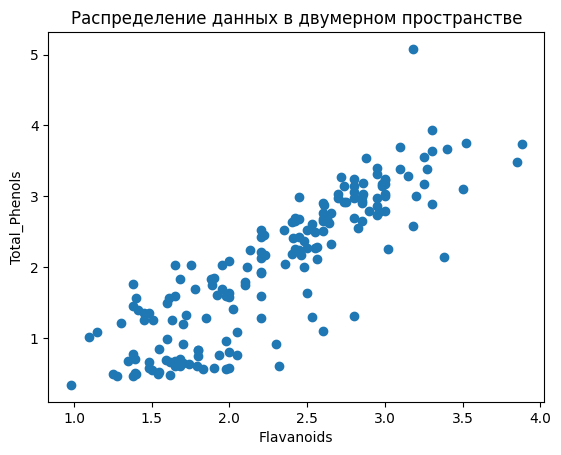

In [47]:

plt.scatter(df["Total_Phenols"], df["Flavanoids"])
plt.xlabel('Flavanoids')
plt.ylabel('Total_Phenols')
plt.title('Распределение данных в двумерном пространстве')


In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

In [48]:

X = df[["Total_Phenols", "Flavanoids"]]
X

,Total_Phenols,Flavanoids
0,2.80,3.06
1,2.65,2.76
2,2.80,3.24
3,3.85,3.49
4,2.80,2.69
...,...,...
173,1.68,0.61
174,1.80,0.75
175,1.59,0.69
176,1.65,0.68


In [49]:

# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=2)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:

print(cluster_centers) # центры кластеров в двумерном пространстве

[[1.75670588 1.13094118]
 [2.7872043  2.85032258]]


In [51]:

print(cluster_labels) #  центры кластеров в двумерном пространстве

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1
 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

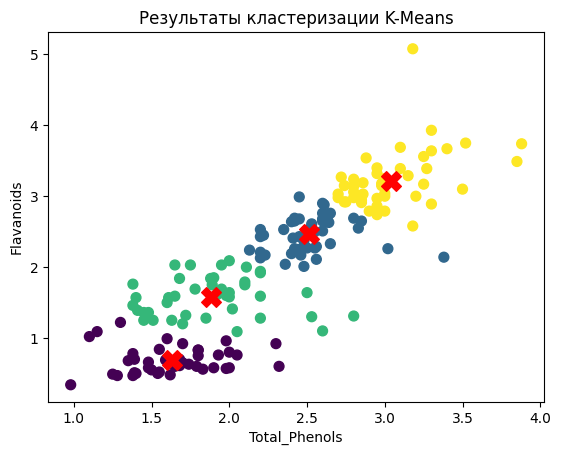

In [66]:

# Визуализируем результаты кластеризации двумерной кластеризации
plt.scatter(df["Total_Phenols"], df["Flavanoids"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.title('Результаты кластеризации K-Means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


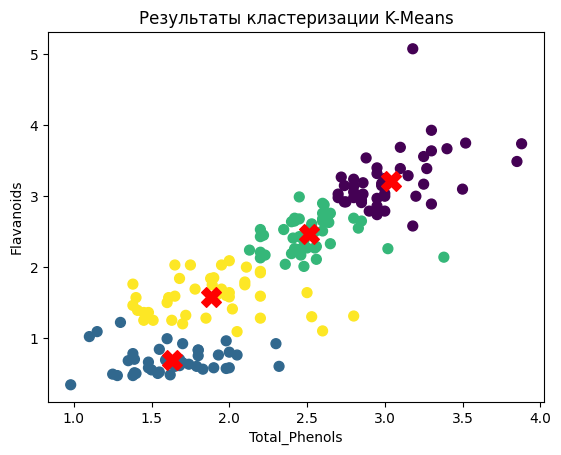

In [67]:

# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=4)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
# Визуализируем результаты кластеризации
plt.scatter(df["Total_Phenols"], df["Flavanoids"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Total_Phenols')
plt.ylabel('Flavanoids')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

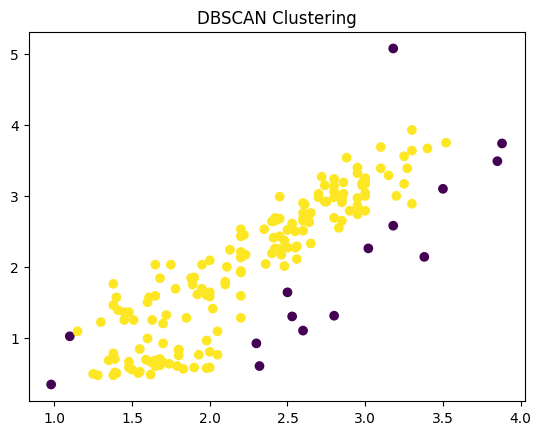

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

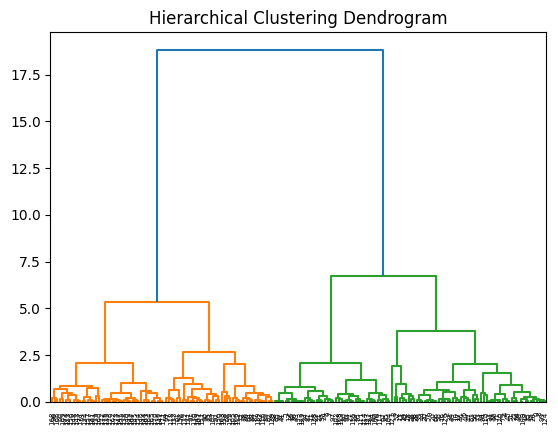

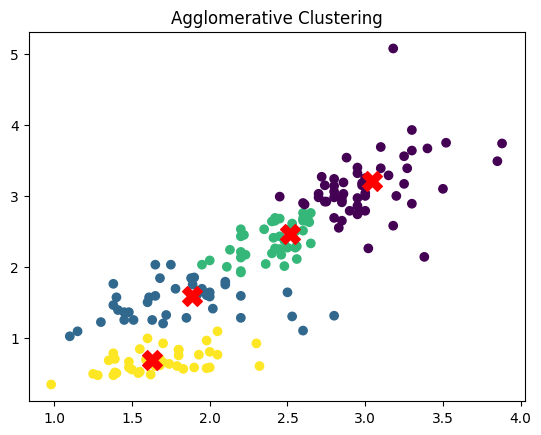

In [69]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.title('Agglomerative Clustering')
plt.show()

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

Если что на эти два пункта код выше, я просто решила все в один засунуть чтоб не дробить. Иерархическая кластеризация если что 1 график, а визуализация кластеров иерархической кластеризации 2 ( я еще туда добавила крестики чтобы было видно центры кластеризации)

In [70]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



'\nНа отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма\n\nfrom ydata_profiling import ProfileReport\n\nProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)\n\n'

Оптимальное число кластеров 2, с баллом 0.5942213406748447


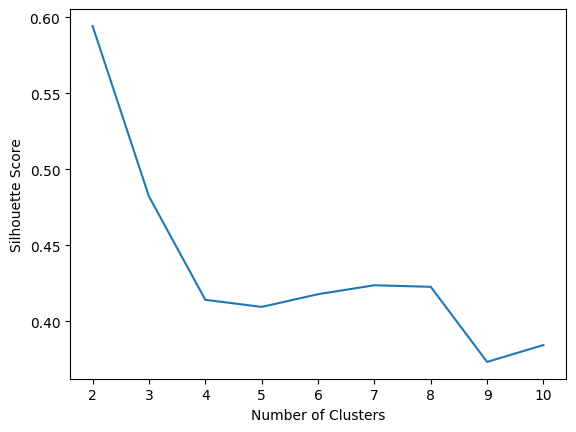

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Поиск оптимального K
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Оптимальное число кластеров 2, с баллом 438.4414795806822


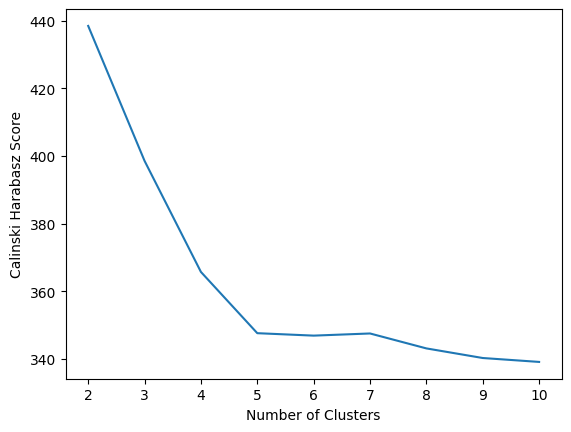

In [72]:
from sklearn.metrics import calinski_harabasz_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

Оптимальное число кластеров 2, с баллом 0.555275393285237


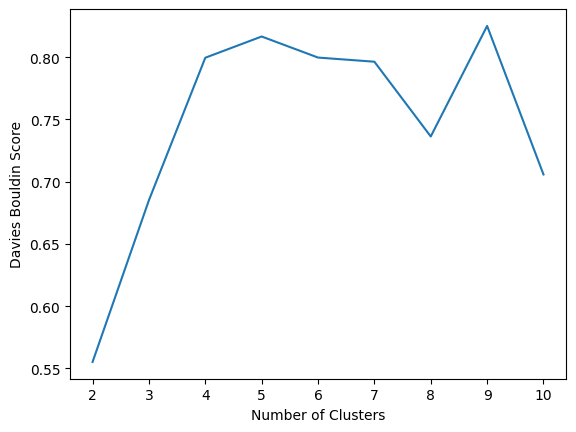

In [73]:
from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = davies_bouldin_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

In [74]:
df['Flavanoids'].unique() # Предположим, что ментальное состояние будет истинными метками классов, по которому мы хотим найти

array([3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52, 2.51, 2.98, 3.15, 3.32,
       2.43, 3.69, 3.64, 2.91, 3.14, 3.4 , 3.93, 3.03, 3.17, 2.41, 2.88,
       2.37, 2.61, 2.68, 2.94, 2.19, 2.97, 2.33, 3.25, 3.19, 2.74, 2.53,
       2.64, 3.04, 3.29, 3.56, 2.63, 3.  , 2.65, 2.92, 3.54, 3.27, 2.99,
       3.74, 2.79, 2.9 , 2.78, 3.23, 3.67, 0.57, 1.09, 1.41, 1.79, 3.1 ,
       1.75, 3.18, 2.  , 1.3 , 1.28, 1.02, 2.86, 1.84, 2.89, 2.14, 1.57,
       2.03, 1.32, 1.85, 2.55, 2.26, 1.58, 1.59, 2.21, 1.94, 1.69, 1.61,
       1.5 , 1.25, 1.46, 2.25, 2.27, 0.99, 2.5 , 3.75, 2.17, 1.36, 2.11,
       1.64, 1.92, 1.76, 2.04, 2.58, 2.01, 2.29, 1.6 , 2.09, 5.08, 2.13,
       2.24, 2.45, 1.22, 1.2 , 0.58, 0.66, 0.47, 0.6 , 0.48, 0.5 , 0.52,
       0.8 , 0.78, 0.55, 0.34, 0.65, 0.76, 1.39, 0.83, 0.63, 1.31, 1.1 ,
       0.92, 0.56, 0.7 , 0.68, 0.84, 0.96, 0.49, 0.51, 0.61, 0.75, 0.69])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

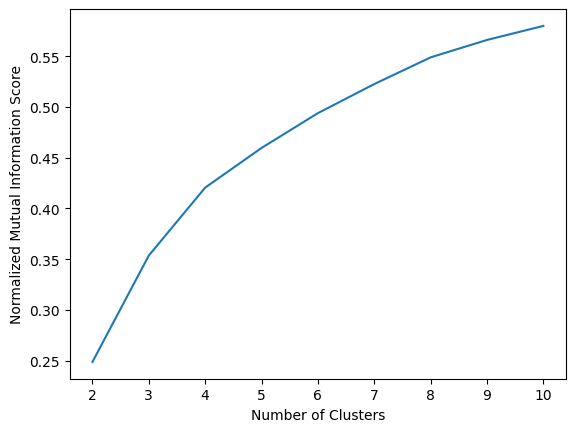

Оптимальное число кластеров 10, с баллом 0.5799066520410293


In [75]:
from sklearn.metrics import normalized_mutual_info_score

# Предположим, что y_true - это истинные метки
y_true = df['Flavanoids'].to_numpy()
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = normalized_mutual_info_score(y_true, kmeans.labels_, average_method='arithmetic')
    scores.append(score)

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Normalized Mutual Information Score')
plt.show()

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

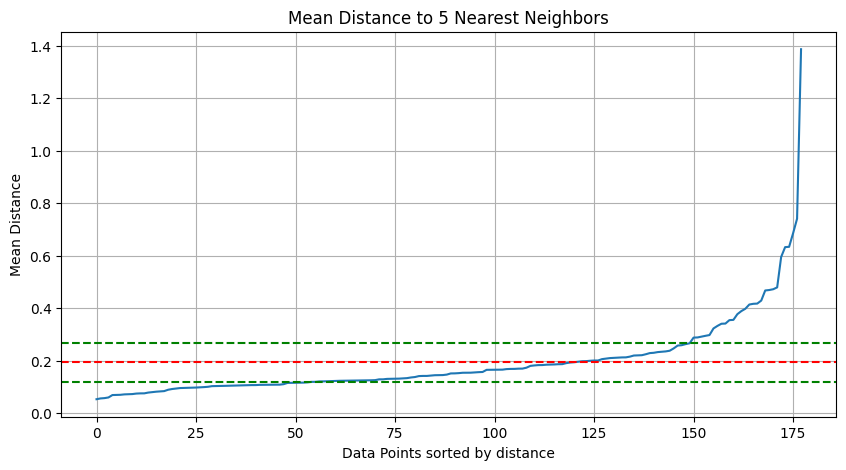

Оптимальный EPS = 0.19304398551601115


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(X_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(X_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

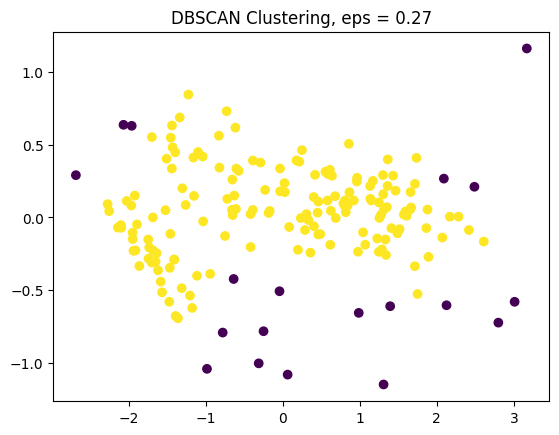

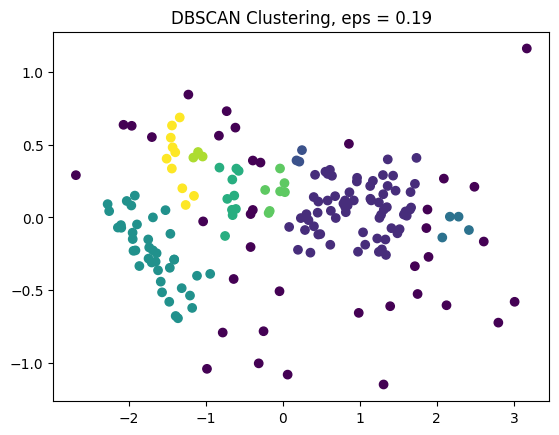

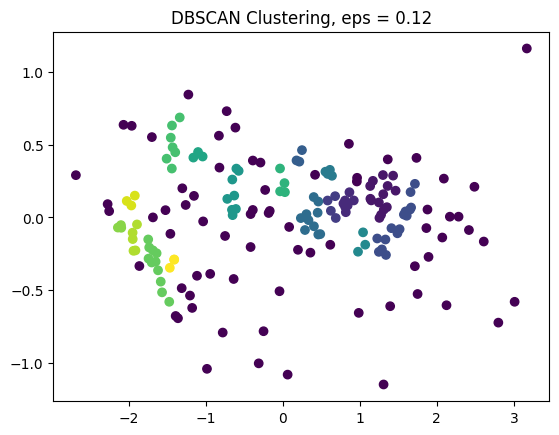

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), np.mean(neighbours) - np.std(neighbours) / 2]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(X_scaled)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()


In [78]:
!pip install ydata-profiling

In [82]:
x1 = df["Alcohol"]
x2 = df["Total_Phenols"]
x3 = df["Flavanoids"]
x = np.array([[i, j, k] for i, j, k in zip(x1, x2, x3)])
x = StandardScaler().fit_transform(x)
x[:5]

array([[1.51861254, 0.80899739, 1.03481896],
       [0.24628963, 0.56864766, 0.73362894],
       [0.19687903, 0.80899739, 1.21553297],
       [1.69154964, 2.49144552, 1.46652465],
       [0.29570023, 0.80899739, 0.66335127]])

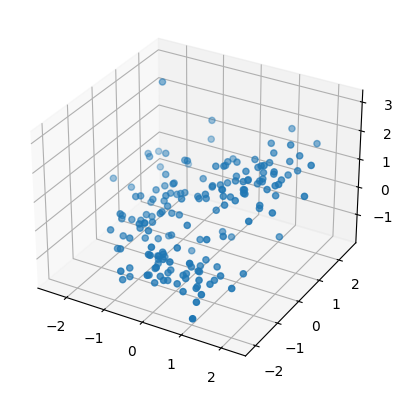

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])

Text(0.5, 1.0, 'Результат PCA (2 компоненты)')

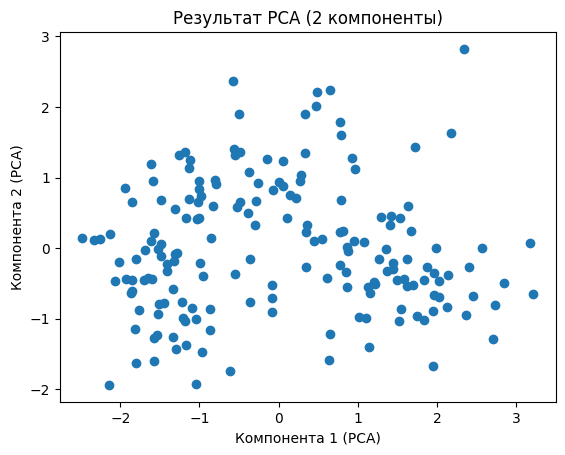

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Создаем объект PCA и снижаем размерность до 2 компонент
pca = PCA(n_components=2)
data_pca = pca.fit_transform(x)

# Восстановим данные обратно в исходное пространство (для демонстрации)
data_restored = pca.inverse_transform(data_pca)
plt.scatter(data_pca[:,0], data_pca[:,1])
plt.xlabel('Компонента 1 (PCA)')
plt.ylabel('Компонента 2 (PCA)')
plt.title('Результат PCA (2 компоненты)')

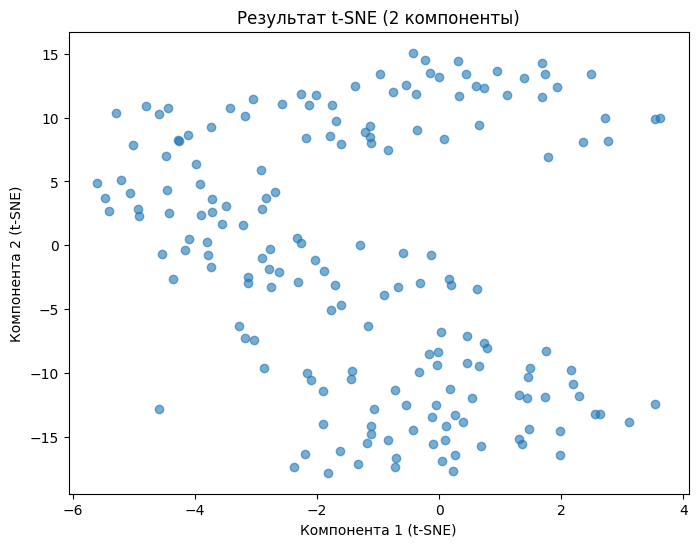

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Создаем объект t-SNE и снижаем размерность до 2 компонент
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(x)

# Визуализируем данные после применения t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.6)
plt.xlabel('Компонента 1 (t-SNE)')
plt.ylabel('Компонента 2 (t-SNE)')
plt.title('Результат t-SNE (2 компоненты)')
plt.show()